<a href="https://colab.research.google.com/github/kevin-r-murphy/BA888-MBTA/blob/main/MBTA_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
trips = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/trips.txt')
shapes = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/shapes.txt')
stop_times = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/stop_times.txt')
stops = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/stops.txt')
route_patterns = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/route_patterns.txt')
route = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/routes.txt')
jan_headway = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/2024-01_Headway.csv')
feb_headway = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/2024-02_Headway.csv')
gated_entries = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/MBTA_Gated_Station_Entries.csv')
headways = pd.concat([jan_headway, feb_headway])

<ipython-input-2-1523b102d7d4>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/trips.txt')
<ipython-input-2-1523b102d7d4>:5: DtypeWarning: Columns (0,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  stop_times = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/stop_times.txt')
<ipython-input-2-1523b102d7d4>:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  jan_headway = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/2024-01_Headway.csv')
<ipython-input-2-1523b102d7d4>:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  feb_headway = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA888-MBTA/main/2024-02_Headway.csv')


In [ ]:
gated_entries.head()

,service_date,time_period,stop_id,station_name,route_or_line,gated_entries,ObjectId
0,2024/02/29 05:00:00+00,(00:00:00),place-welln,Wellington,Orange Line,2.0,275252
1,2024/02/29 05:00:00+00,(00:00:00),place-wimnl,Wood Island,Blue Line,5.0,275262
2,2024/02/29 05:00:00+00,(00:30:00),place-sull,Sullivan Square,Orange Line,2.0,275265
3,2024/02/29 05:00:00+00,(00:00:00),place-wondl,Wonderland,Blue Line,12.0,275266
4,2024/02/29 05:00:00+00,(00:00:00),place-asmnl,Ashmont,Red Line,6.0,275271


In [ ]:
headways['route_id'].value_counts()

route_id
Green-E     260926
Orange      256122
Green-D     245836
Red         217069
Green-B     207540
Green-C     178604
Blue        167700
Mattapan     85731
Name: count, dtype: int64

In [ ]:
print(trips.shape)
print(shapes.shape)
print(stop_times.shape)
print(stops.shape)
print(route_patterns.shape)
print(route.shape)

(83243, 12)
(292754, 5)
(2043367, 12)
(9700, 19)
(818, 9)
(217, 14)


In [ ]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed
0,1,BUS12024-hbc14011-Weekday-02,60168424,Harvard,NaN,0,C01-1,010128,1,NaN,1-_-0,1
1,1,BUS12024-hbc14011-Weekday-02,60168429,Harvard,NaN,0,C01-4,010128,1,NaN,1-_-0,1
2,1,BUS12024-hbc14011-Weekday-02,60168432,Harvard,NaN,0,C01-7,010128,1,NaN,1-_-0,1
3,1,BUS12024-hbc14011-Weekday-02,60168435,Harvard,NaN,0,C01-9,010128,1,NaN,1-_-0,1
4,1,BUS12024-hbc14011-Weekday-02,60168437,Harvard,NaN,0,C01-1,010128,1,NaN,1-_-0,1


In [ ]:
trips['trip_route_type'].value_counts()

trip_route_type
3.0    4787
Name: count, dtype: int64

In [ ]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,010128,42.329848,-71.083876,10001,NaN
1,010128,42.329788,-71.083268,10002,NaN
2,010128,42.330089,-71.083198,10003,NaN
3,010128,42.330296,-71.083161,10004,NaN
4,010128,42.330493,-71.083112,10005,NaN


In [ ]:
stop_times[stop_times['trip_id'] == 59428098] #Can't Convert arrival and departure into date time because hours are greater than 23

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,continuous_pickup,continuous_drop_off
16,59428098,25:05:00,25:05:00,70261,1,NaN,0,1,0,asmnl,NaN,NaN
17,59428098,25:06:00,25:06:00,70263,2,NaN,0,0,0,cedgr,NaN,NaN
18,59428098,25:08:00,25:08:00,70265,3,NaN,0,0,0,butlr,NaN,NaN
19,59428098,25:09:00,25:09:00,70267,4,NaN,0,0,0,miltt,NaN,NaN
20,59428098,25:10:00,25:10:00,70269,5,NaN,0,0,0,cenav,NaN,NaN
21,59428098,25:11:00,25:11:00,70271,6,NaN,0,0,0,valrd,NaN,NaN
22,59428098,25:12:00,25:12:00,70273,7,NaN,0,0,0,capst,NaN,NaN
23,59428098,25:13:00,25:13:00,70275,8,NaN,1,0,0,matt,NaN,NaN


In [ ]:
stop_times['stop_id'] = stop_times['stop_id'].astype(str)
stops['stop_id'] = stops['stop_id'].astype(str)
stop_times = stop_times.merge(stops, how = 'left', on = 'stop_id')

In [ ]:
trips['route_id'] = trips['route_id'].astype(str)
trips['trip_id'] = trips['trip_id'].astype(str)
stop_times['trip_id'] = stop_times['trip_id'].astype(str)
trips = trips.merge(route[['route_id','route_desc', 'route_type']], how = 'left', on = 'route_id')

In [ ]:
stop_times = stop_times.merge(trips[['trip_id','route_desc', 'route_type', 'route_id']], how = 'left', on = 'trip_id')

In [ ]:
stop_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043367 entries, 0 to 2043366
Data columns (total 33 columns):
 #   Column               Dtype  
---  ------               -----  
 0   trip_id              object 
 1   arrival_time         object 
 2   departure_time       object 
 3   stop_id              object 
 4   stop_sequence        int64  
 5   stop_headsign        object 
 6   pickup_type          int64  
 7   drop_off_type        int64  
 8   timepoint            int64  
 9   checkpoint_id        object 
 10  continuous_pickup    float64
 11  continuous_drop_off  float64
 12  stop_code            float64
 13  stop_name            object 
 14  stop_desc            object 
 15  platform_code        object 
 16  platform_name        object 
 17  stop_lat             float64
 18  stop_lon             float64
 19  zone_id              object 
 20  stop_address         object 
 21  stop_url             object 
 22  level_id             object 
 23  location_type        int64  
 24

In [ ]:
stop_times[stop_times['arrival_time'] != stop_times['departure_time']]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type,route_desc,route_type,route_id
7101,59668981,24:48:00,25:06:00,70020,90,NaN,0,0,1,dwnxg,...,0,place-dwnxg,1,Boston,NaN,NaN,1.0,Rapid Transit,1,Orange
8742,59669063,24:50:00,25:06:00,70021,100,NaN,0,0,1,dwnxg,...,0,place-dwnxg,1,Boston,NaN,NaN,1.0,Rapid Transit,1,Orange
13141,59669299,24:48:00,25:06:00,70020,90,NaN,0,0,1,dwnxg,...,0,place-dwnxg,1,Boston,NaN,NaN,1.0,Rapid Transit,1,Orange
13162,59669300,24:50:00,25:06:00,70021,100,NaN,0,0,1,dwnxg,...,0,place-dwnxg,1,Boston,NaN,NaN,1.0,Rapid Transit,1,Orange
22701,59724100,24:48:00,25:06:00,70020,90,NaN,0,0,1,dwnxg,...,0,place-dwnxg,1,Boston,NaN,NaN,1.0,Rapid Transit,1,Orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030799,CR-627895-809,10:36:00,10:37:00,NEC-1851-03,100,NaN,0,0,1,NaN,...,0,place-NEC-1851,1,Providence,NaN,NaN,2.0,Commuter Rail,2,CR-Providence
2030824,CR-627898-806,06:34:00,06:35:00,NEC-1851-03,20,South Station via Ruggles,0,0,1,NaN,...,0,place-NEC-1851,1,Providence,NaN,NaN,2.0,Commuter Rail,2,CR-Providence
2030860,CR-627901-803,07:35:00,07:45:00,NEC-1851-03,90,NaN,0,0,1,NaN,...,0,place-NEC-1851,1,Providence,NaN,NaN,2.0,Commuter Rail,2,CR-Providence
2030865,CR-627902-802,05:13:00,05:15:00,NEC-1851-03,20,South Station via Ruggles,0,0,1,NaN,...,0,place-NEC-1851,1,Providence,NaN,NaN,2.0,Commuter Rail,2,CR-Providence


In [ ]:
trips[trips['trip_id'] == '60128454']

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed,route_desc,route_type
74080,Green-E,NewYearsEve,60128454,Medford/Tufts,NaN,1,B800-45,8000027,1,NaN,Green-E-886-1,2,Rapid Transit,0


In [ ]:
trips[trips['trip_id'] == '59428098']

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed,route_desc,route_type
74580,Mattapan,WinterSaturday,59428098,Mattapan,NaN,0,M899_-2,899_0005,1,NaN,Mattapan-_-0,2,Rapid Transit,0


In [ ]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed,route_desc,route_type
0,1,BUS12024-hbc14011-Weekday-02,60168424,Harvard,NaN,0,C01-1,010128,1,NaN,1-_-0,1,Key Bus,3
1,1,BUS12024-hbc14011-Weekday-02,60168429,Harvard,NaN,0,C01-4,010128,1,NaN,1-_-0,1,Key Bus,3
2,1,BUS12024-hbc14011-Weekday-02,60168432,Harvard,NaN,0,C01-7,010128,1,NaN,1-_-0,1,Key Bus,3
3,1,BUS12024-hbc14011-Weekday-02,60168435,Harvard,NaN,0,C01-9,010128,1,NaN,1-_-0,1,Key Bus,3
4,1,BUS12024-hbc14011-Weekday-02,60168437,Harvard,NaN,0,C01-1,010128,1,NaN,1-_-0,1,Key Bus,3


In [ ]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,platform_code,platform_name,stop_lat,stop_lon,zone_id,stop_address,stop_url,level_id,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type
0,1,1.0,Washington St opp Ruggles St,NaN,NaN,NaN,42.330957,-71.082754,ExpressBus-Downtown,NaN,https://www.mbta.com/stops/1,NaN,0,NaN,1,Boston,Washington Street,Ruggles Street,3.0
1,10,10.0,Theo Glynn Way @ Newmarket Sq,NaN,NaN,NaN,42.330555,-71.068787,LocalBus,NaN,https://www.mbta.com/stops/10,NaN,0,NaN,1,Boston,Theodore Glynn Way,Newmarket Square,3.0
2,10000,10000.0,Tremont St opp Temple Pl,NaN,NaN,NaN,42.355692,-71.062911,LocalBus,NaN,https://www.mbta.com/stops/10000,NaN,0,NaN,1,Boston,Tremont Street,Temple Place,3.0
3,10003,10003.0,Albany St opp Randall St,NaN,NaN,NaN,42.331591,-71.076237,LocalBus,NaN,https://www.mbta.com/stops/10003,NaN,0,NaN,1,Boston,Albany Street,Randall Street,3.0
4,10005,10005.0,Albany St opp E Concord St,NaN,NaN,NaN,42.335017,-71.071280,LocalBus,NaN,https://www.mbta.com/stops/10005,NaN,0,NaN,1,Boston,Albany Street,NaN,3.0


In [ ]:
route_patterns.head()

,route_pattern_id,route_id,direction_id,route_pattern_name,route_pattern_time_desc,route_pattern_typicality,route_pattern_sort_order,representative_trip_id,canonical_route_pattern
0,Red-3-0,Red,0,Alewife - Braintree,NaN,1,100100000,canonical-Red-C1-0,1
1,Red-1-0,Red,0,Alewife - Ashmont,NaN,1,100100001,canonical-Red-C2-0,1
2,Red-3-1,Red,1,Braintree - Alewife,NaN,1,100101000,canonical-Red-C1-1,1
3,Red-1-1,Red,1,Ashmont - Alewife,NaN,1,100101001,canonical-Red-C2-1,1
4,Mattapan-_-0,Mattapan,0,Ashmont - Mattapan,NaN,1,100110000,canonical-Mattapan-C1-0,1


In [ ]:
route.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,route_sort_order,route_fare_class,line_id,listed_route,network_id
0,Red,1,NaN,Red Line,Rapid Transit,1,https://www.mbta.com/schedules/Red,DA291C,FFFFFF,10010,Rapid Transit,line-Red,NaN,rapid_transit
1,Mattapan,1,NaN,Mattapan Trolley,Rapid Transit,0,https://www.mbta.com/schedules/Mattapan,DA291C,FFFFFF,10011,Rapid Transit,line-Mattapan,NaN,m_rapid_transit
2,Orange,1,NaN,Orange Line,Rapid Transit,1,https://www.mbta.com/schedules/Orange,ED8B00,FFFFFF,10020,Rapid Transit,line-Orange,NaN,rapid_transit
3,Green-B,1,B,Green Line B,Rapid Transit,0,https://www.mbta.com/schedules/Green-B,00843D,FFFFFF,10032,Rapid Transit,line-Green,NaN,rapid_transit
4,Green-C,1,C,Green Line C,Rapid Transit,0,https://www.mbta.com/schedules/Green-C,00843D,FFFFFF,10033,Rapid Transit,line-Green,NaN,rapid_transit


In [ ]:
trips['route_id'].value_counts()

route_id
Green-D                  3420
Green-B                  2764
Shuttle-CopleyKenmore    2760
Green-C                  2540
Green-E                  2405
                         ... 
428                        12
8993                       10
3233                        6
CR-Foxboro                  4
CapeFlyer                   2
Name: count, Length: 183, dtype: int64

**EDA Charts**

Text(0, 0.5, 'Route Name')

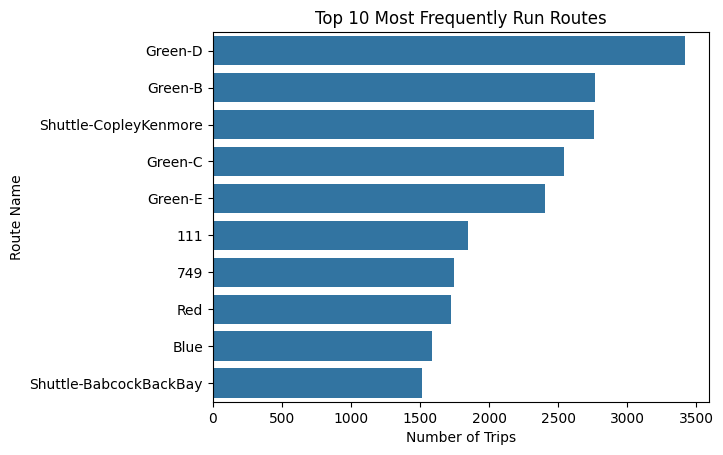

In [ ]:
sns.barplot(trips['route_id'].value_counts().sort_values(ascending=False).head(10), orient = 'h')
plt.title('Top 10 Most Frequently Run Routes')
plt.xlabel('Number of Trips')
plt.ylabel('Route Name')

Text(0, 0.5, 'Stop Name')

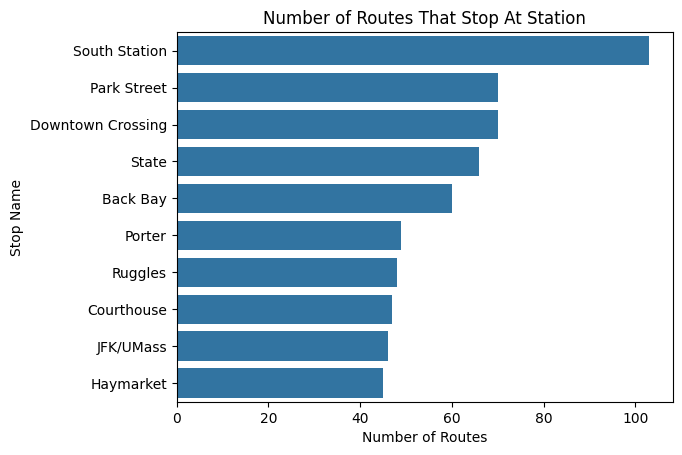

In [ ]:
sns.barplot(stops['stop_name'].value_counts().sort_values(ascending=False).head(10), orient = 'h')
plt.title('Number of Routes That Stop At Station')
plt.xlabel('Number of Routes')
plt.ylabel('Stop Name')

Text(0, 0.5, 'Stop Name')

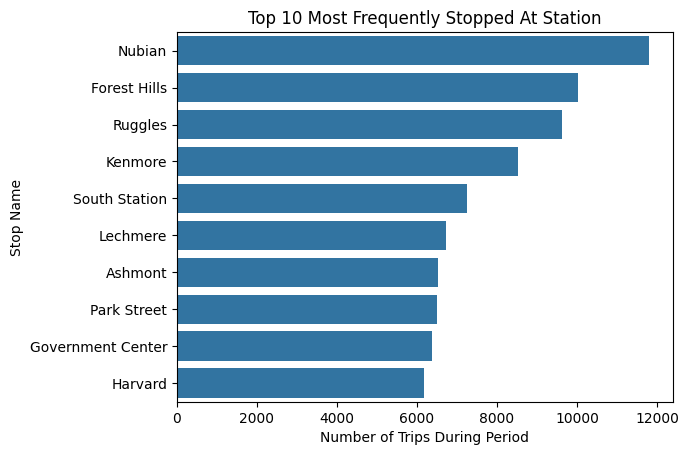

In [ ]:
sns.barplot(stop_times['stop_name'].value_counts().sort_values(ascending=False).head(10), orient = 'h')
plt.title('Top 10 Most Frequently Stopped At Station')
plt.xlabel('Number of Trips During Period')
plt.ylabel('Stop Name')

Text(0.5, 0, 'Number of Trips')

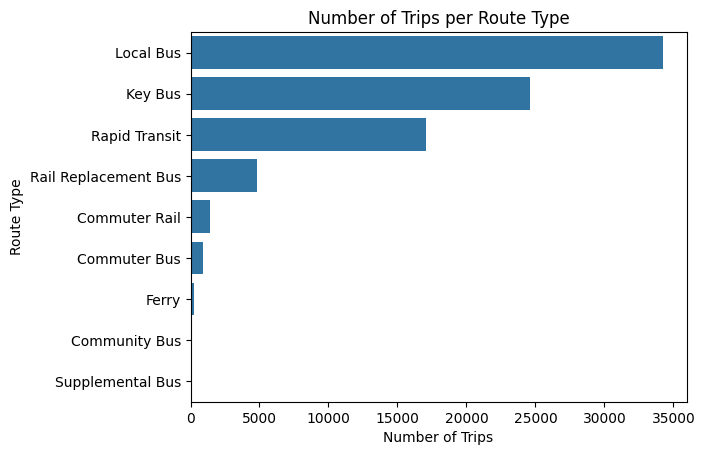

In [ ]:
sns.barplot(trips['route_desc'].value_counts().sort_values(ascending=False), orient = 'h')
plt.title('Number of Trips per Route Type')
plt.ylabel('Route Type')
plt.xlabel('Number of Trips')

Text(0.5, 0, 'Number of Stops')

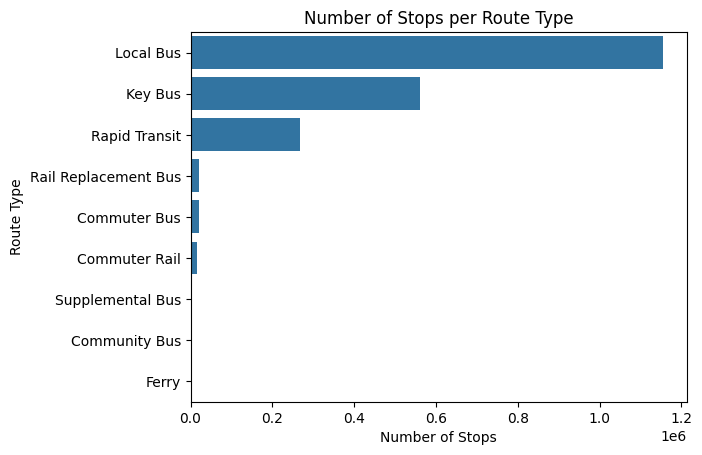

In [ ]:
sns.barplot(stop_times['route_desc'].value_counts(), orient = 'h')
plt.title('Number of Stops per Route Type')
plt.ylabel('Route Type')
plt.xlabel('Number of Stops')

Text(0.5, 0, 'Longitude')

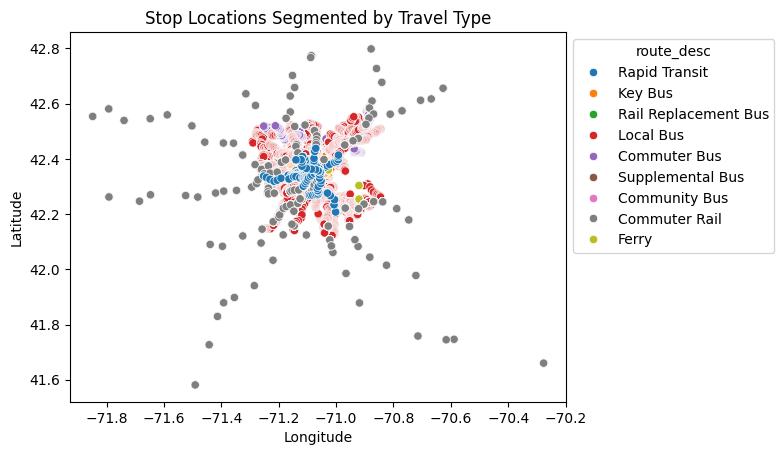

In [ ]:
ax = sns.scatterplot(data = stop_times, y = 'stop_lat', x = 'stop_lon', hue = 'route_desc')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Stop Locations Segmented by Travel Type')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

Text(0.5, 0, 'Longitude')

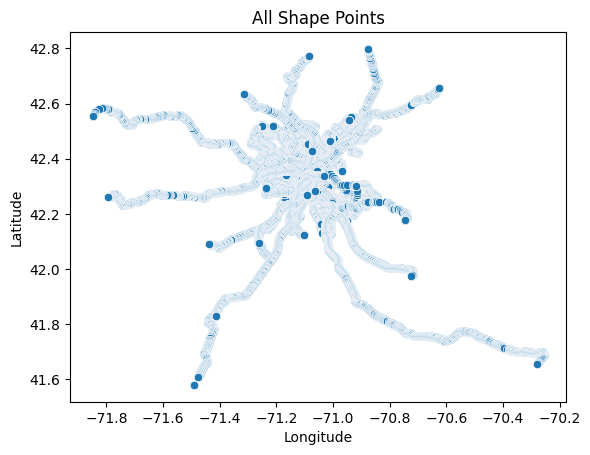

In [ ]:
sns.scatterplot(data = shapes, y = 'shape_pt_lat', x = 'shape_pt_lon')
plt.title('All Shape Points')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

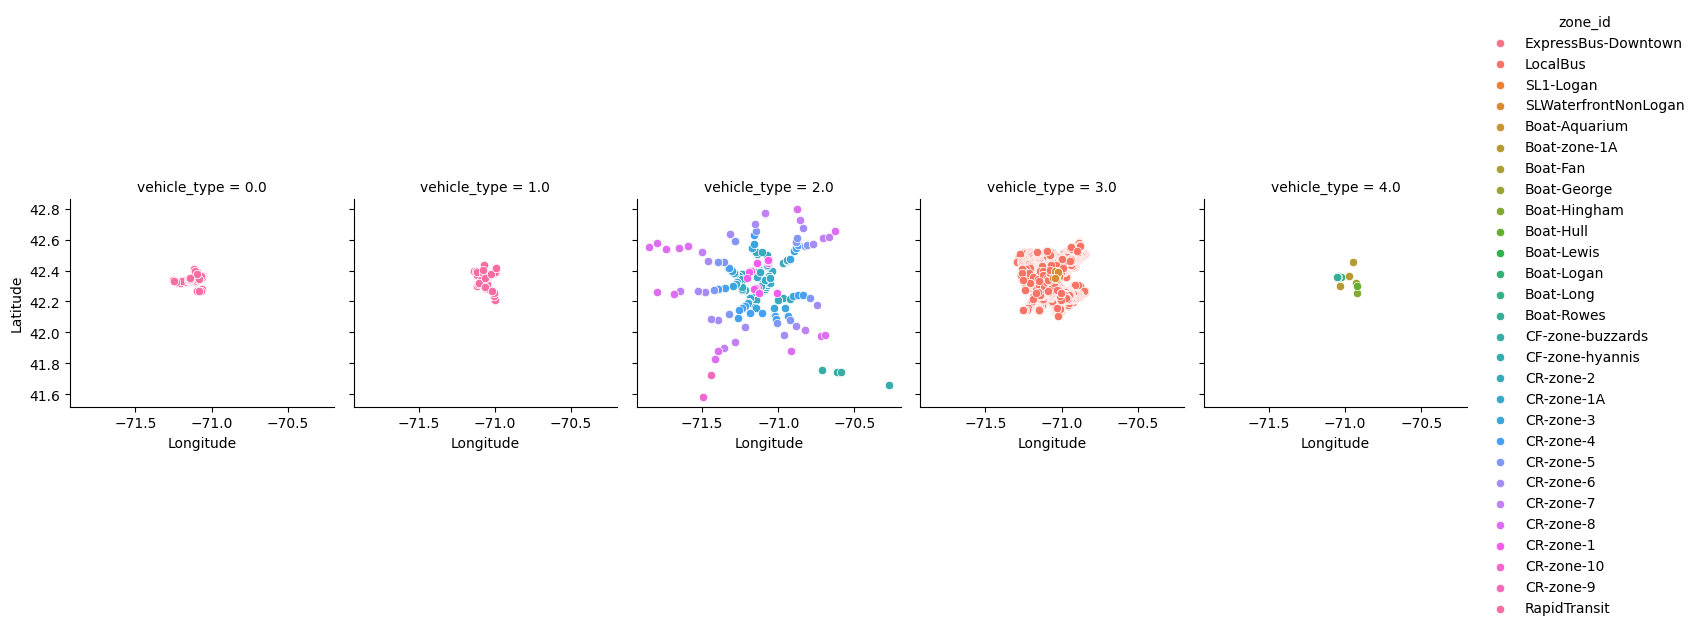

In [ ]:
g = sns.FacetGrid(data = stops, col = 'vehicle_type', hue = 'zone_id')
g.map(sns.scatterplot, 'stop_lon', 'stop_lat')
g.add_legend()
#g.set_titles('All Stop Locations Segmented by Zone')
g.set_ylabels('Latitude')
g.set_xlabels('Longitude')

Text(0.5, 0, 'Longitude')

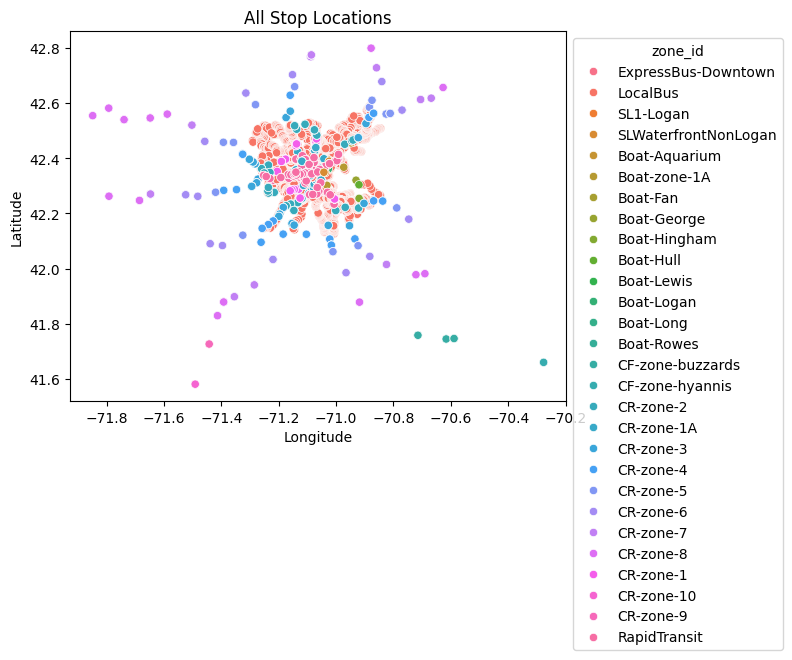

In [ ]:
ax = sns.scatterplot(data = stops, x = 'stop_lon', y = 'stop_lat', hue = 'zone_id')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('All Stop Locations')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

**Gate Entries & Headways**

In [ ]:
headways.head()

,service_date,route_id,trunk_route_id,branch_route_id,trip_id,direction_id,direction,parent_station,stop_id,stop_name,stop_departure_datetime,stop_departure_sec,headway_trunk_seconds,headway_branch_seconds
0,2024-01-01,Green-B,Green,Green-B,60564050,1,East,place-babck,170136,Babcock Street,2024-01-01T05:41:57Z,20517,NaN,NaN
1,2024-01-01,Green-B,Green,Green-B,ADDED-1581739663,1,East,place-babck,170136,Babcock Street,2024-01-01T05:53:27Z,21207,690.0,690.0
2,2024-01-01,Green-B,Green,Green-B,ADDED-1581739665,1,East,place-babck,170136,Babcock Street,2024-01-01T06:03:21Z,21801,594.0,594.0
3,2024-01-01,Green-B,Green,Green-B,ADDED-1581739671,1,East,place-babck,170136,Babcock Street,2024-01-01T06:08:32Z,22112,311.0,311.0
4,2024-01-01,Green-B,Green,Green-B,60564070,1,East,place-babck,170136,Babcock Street,2024-01-01T06:24:06Z,23046,934.0,934.0


****Headway Analysis****

In [ ]:
stop_times_RT = stop_times.merge(headways[['service_date','stop_departure_datetime', 'stop_departure_sec', 'headway_trunk_seconds','trip_id','stop_id']], on = ['trip_id', 'stop_id'], how = 'left')
stop_times_RT['headway_mins'] = stop_times_RT['headway_trunk_seconds'] / 60
stop_times_RT.dropna(subset = ['headway_mins'],inplace = True)
stop_times_RT.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,at_street,vehicle_type,route_desc,route_type,route_id,service_date,stop_departure_datetime,stop_departure_sec,headway_trunk_seconds,headway_mins
40,59428097,05:18:00,05:18:00,70271,6,NaN,0,0,0,valrd,...,NaN,0.0,Rapid Transit,0,Mattapan,2024-01-13,2024-01-13T05:20:55Z,19255.0,1389.0,23.150000
46,59428097,05:19:00,05:19:00,70273,7,NaN,0,0,0,capst,...,NaN,0.0,Rapid Transit,0,Mattapan,2024-01-13,2024-01-13T05:22:19Z,19339.0,1383.0,23.050000
53,59428098,25:06:00,25:06:00,70263,2,NaN,0,0,0,cedgr,...,NaN,0.0,Rapid Transit,0,Mattapan,2024-01-06,2024-01-07T01:04:17Z,90257.0,917.0,15.283333
54,59428098,25:06:00,25:06:00,70263,2,NaN,0,0,0,cedgr,...,NaN,0.0,Rapid Transit,0,Mattapan,2024-01-13,2024-01-14T01:02:24Z,90144.0,759.0,12.650000
55,59428098,25:06:00,25:06:00,70263,2,NaN,0,0,0,cedgr,...,NaN,0.0,Rapid Transit,0,Mattapan,2024-01-20,2024-01-21T01:01:27Z,90087.0,880.0,14.666667


Text(0.5, 0, 'Route')

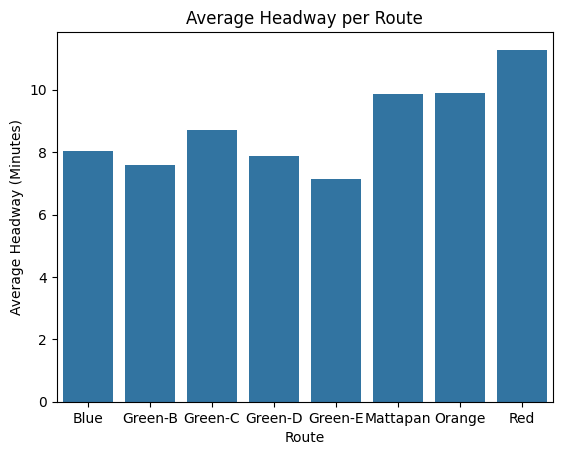

In [ ]:
sns.barplot(stop_times_RT['headway_mins'].groupby(stop_times_RT['route_id']).mean())
plt.title('Average Headway per Route')
plt.ylabel('Average Headway (Minutes)')
plt.xlabel('Route')

Text(0.5, 0, 'Station')

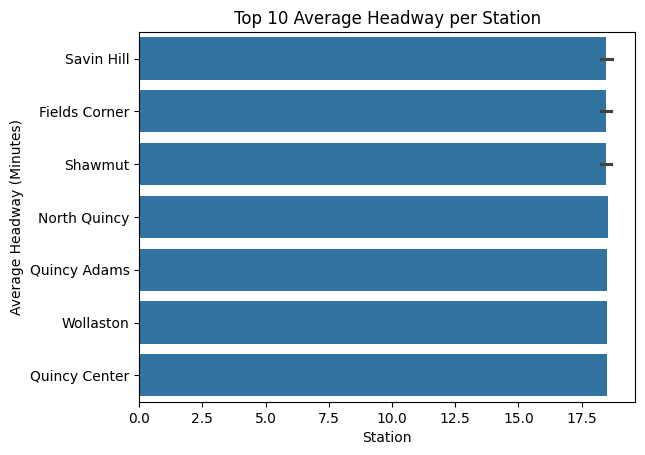

In [ ]:
avg_station_headway = stop_times_RT['headway_mins'].groupby(stop_times_RT['stop_id']).mean().to_frame()
avg_station_headway_named = avg_station_headway.merge(stops[['stop_id','stop_name', 'stop_lat', 'stop_lon']], on = 'stop_id', how = 'left')
sns.barplot(data = avg_station_headway_named.sort_values(by = 'headway_mins', ascending = False)[:10], y = 'stop_name', x = 'headway_mins')
plt.title('Top 10 Average Headway per Station')
plt.ylabel('Average Headway (Minutes)')
plt.xlabel('Station')

Text(0.5, 0, 'Station')

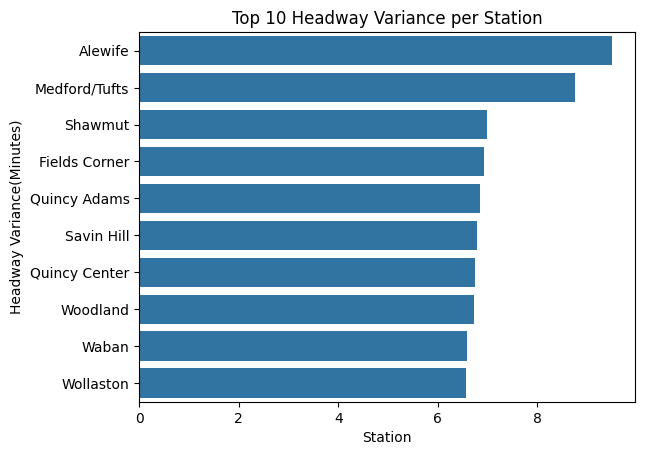

In [ ]:
var_station_headway = stop_times_RT['headway_mins'].groupby(stop_times_RT['stop_id']).std().to_frame()
var_station_headway_named = var_station_headway.merge(stops[['stop_id','stop_name', 'stop_lat', 'stop_lon']], on = 'stop_id', how = 'left')
sns.barplot(data = var_station_headway_named.sort_values(by = 'headway_mins', ascending = False)[:10], y = 'stop_name', x = 'headway_mins')
plt.title('Top 10 Headway Variance per Station')
plt.ylabel('Headway Variance(Minutes)')
plt.xlabel('Station')

****Variance in Journey Length****

In [ ]:
journey_length = stop_times_RT.sort_values(by = ['service_date', 'stop_sequence','trip_id'], ascending=[True, True, True])
journey_length['prev_sec'] = journey_length.groupby(['trip_id', 'service_date'])['stop_departure_sec'].shift(1)
journey_length['prev_station'] = journey_length.groupby(['trip_id', 'service_date'])['stop_name'].shift(1)
journey_length['journey_length'] = (journey_length['stop_departure_sec'] - journey_length['prev_sec']) / 60
journey_length['journey_name'] = journey_length['prev_station'] + ' to ' + journey_length['stop_name']
journey_length_chart = journey_length.groupby('journey_name')['journey_length'].agg(['mean', 'std', 'count']).reset_index()
journey_length = journey_length_chart[journey_length_chart['count'] > 50]

Text(0, 0.5, 'Event (Minimum 50 Events)')

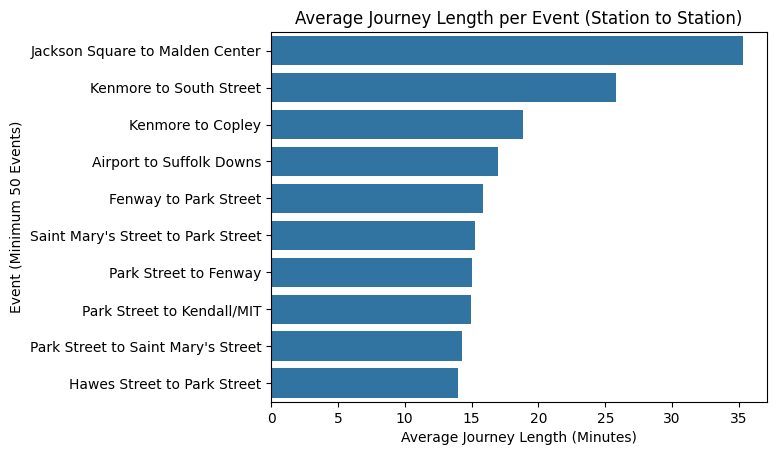

In [ ]:
sns.barplot(data = journey_length_chart.sort_values(by = 'mean', ascending = False).head(10),y = 'journey_name', x = 'mean', orient = 'h')
plt.title('Average Journey Length per Event (Station to Station)')
plt.xlabel('Average Journey Length (Minutes)')
plt.ylabel('Event (Minimum 50 Events)')

Text(0, 0.5, 'Event (Minimum 50 Events)')

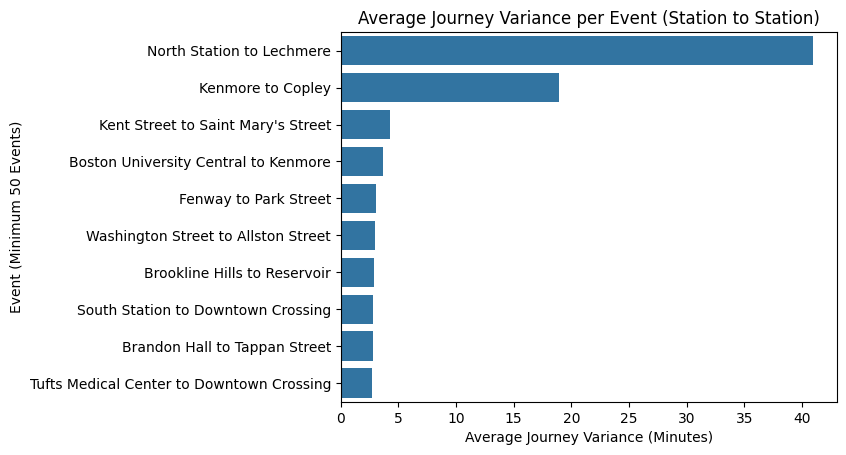

In [ ]:
sns.barplot(data = journey_length_chart.sort_values(by = 'std', ascending = False).head(10),y = 'journey_name', x = 'std', orient = 'h')
plt.title('Average Journey Variance per Event (Station to Station)')
plt.xlabel('Average Journey Variance (Minutes)')
plt.ylabel('Event (Minimum 50 Events)')

In [ ]:
stop_times[(stop_times['trip_id'] == '60455654') & (stop_times['stop_id'] == '70034')]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type,route_desc,route_type,route_id
1464124,60455654,24:31:00,24:31:00,70034,10,NaN,0,0,1,mlmnl,...,0,place-mlmnl,1,Malden,NaN,NaN,1.0,Rapid Transit,1,Orange


In [ ]:
trips[trips['trip_id'] == '60455654']

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed,route_desc,route_type
75879,Orange,RTL12024-hmo14011-Weekday-01,60455654,Forest Hills,NaN,0,O903_-2,903_0022,1,NaN,Orange-3-0,0,Rapid Transit,1


In [ ]:
trips[trips['route_id'] == 'Green-B']

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed,route_desc,route_type
62989,Green-B,LRV12024-hlb14011-Weekday-55,60564033,Boston College,NaN,0,B800-1,8000013,1,NaN,Green-B-812-0,2,Rapid Transit,0
62990,Green-B,LRV12024-hlb14011-Weekday-55,60564061,Boston College,NaN,0,B800-11,8000025,1,NaN,Green-B-812-0,2,Rapid Transit,0
62991,Green-B,LRV12024-hlb14011-Weekday-55,60564127,Boston College,NaN,0,B800-2,8000013,1,NaN,Green-B-812-0,2,Rapid Transit,0
62992,Green-B,LRV12024-hlb14011-Weekday-55,60564129,Boston College,NaN,0,B800-4,8000013,1,NaN,Green-B-812-0,2,Rapid Transit,0
62993,Green-B,LRV12024-hlb14011-Weekday-55,60564130,Boston College,NaN,0,B800-5,8000013,1,NaN,Green-B-812-0,2,Rapid Transit,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65748,Green-B,NewYearsEve,60128548,Government Center,NaN,1,B800-4,8000012,1,NaN,Green-B-812-1,2,Rapid Transit,0
65749,Green-B,NewYearsEve,60128549,Government Center,NaN,1,B800-2,8000012,1,NaN,Green-B-812-1,2,Rapid Transit,0
65750,Green-B,NewYearsEve,60128551,Government Center,NaN,1,B800-14,8000012,1,NaN,Green-B-812-1,2,Rapid Transit,0
65751,Green-B,NewYearsEve,60127715,Medford/Tufts,NaN,1,B800-12,8000014,1,NaN,Green-B-816-1,2,Rapid Transit,0
